In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Hierarchical Cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem3_Airlines.csv")
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.shape

(3999, 12)

In [5]:
df.columns = [col.replace("#", "").replace("?", "").lower() for col in df.columns]

In [6]:
df.head(2)

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df.drop("id", axis =1).describe(percentiles = [0.25, .5, .75, .98, .995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,366022.68,642777.25,1704838.0
qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,2556.00,6057.96,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.00,5.00,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,1.00,2.00,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,1.00,1.00,5.0
bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,84841.76,129343.17,263685.0
bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,37.00,47.02,86.0
flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,4650.00,9150.16,30817.0
flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,14.00,26.00,53.0
days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8228.00,8296.00,8296.0


array([[<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'qual_miles'}>,
        <Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>],
       [<Axes: title={'center': 'cc3_miles'}>,
        <Axes: title={'center': 'bonus_miles'}>,
        <Axes: title={'center': 'bonus_trans'}>,
        <Axes: title={'center': 'flight_miles_12mo'}>],
       [<Axes: title={'center': 'flight_trans_12'}>,
        <Axes: title={'center': 'days_since_enroll'}>,
        <Axes: title={'center': 'award'}>, <Axes: >]], dtype=object)

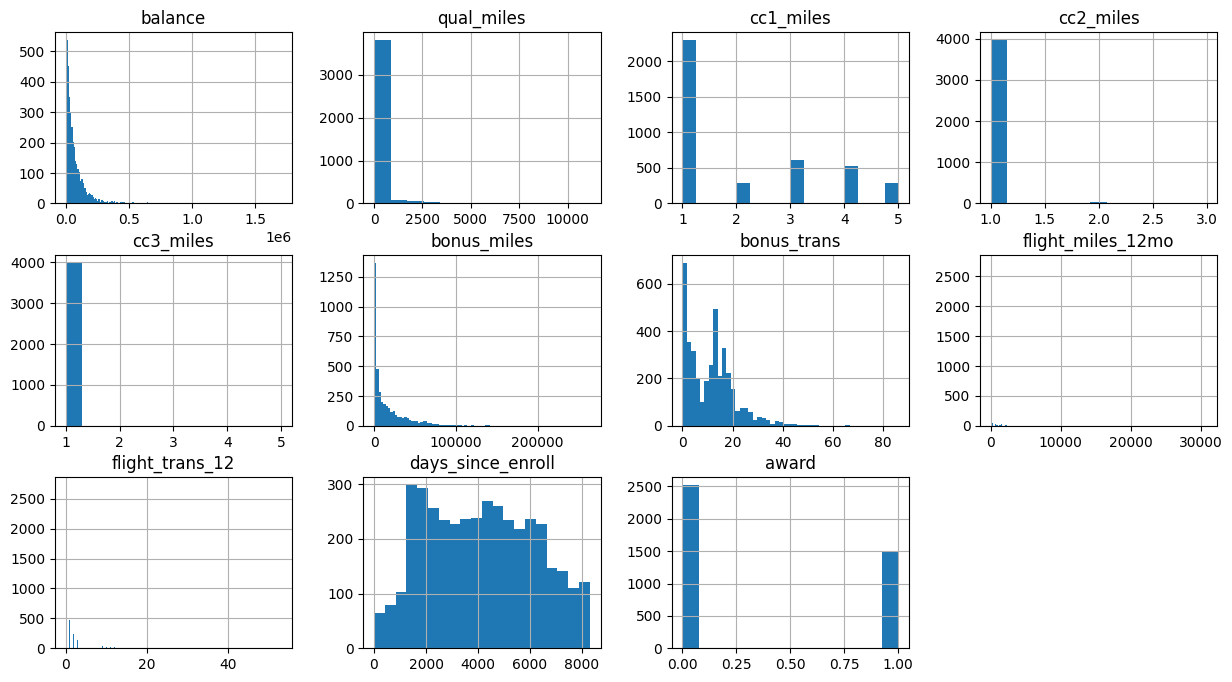

In [10]:
df.drop("id", axis= 1).hist(bins = "auto", figsize = (15,8), layout = (3,4), xlabelsize= 10, ylabelsize = 10)

In [11]:
newdf = df.drop("id", axis = 1)

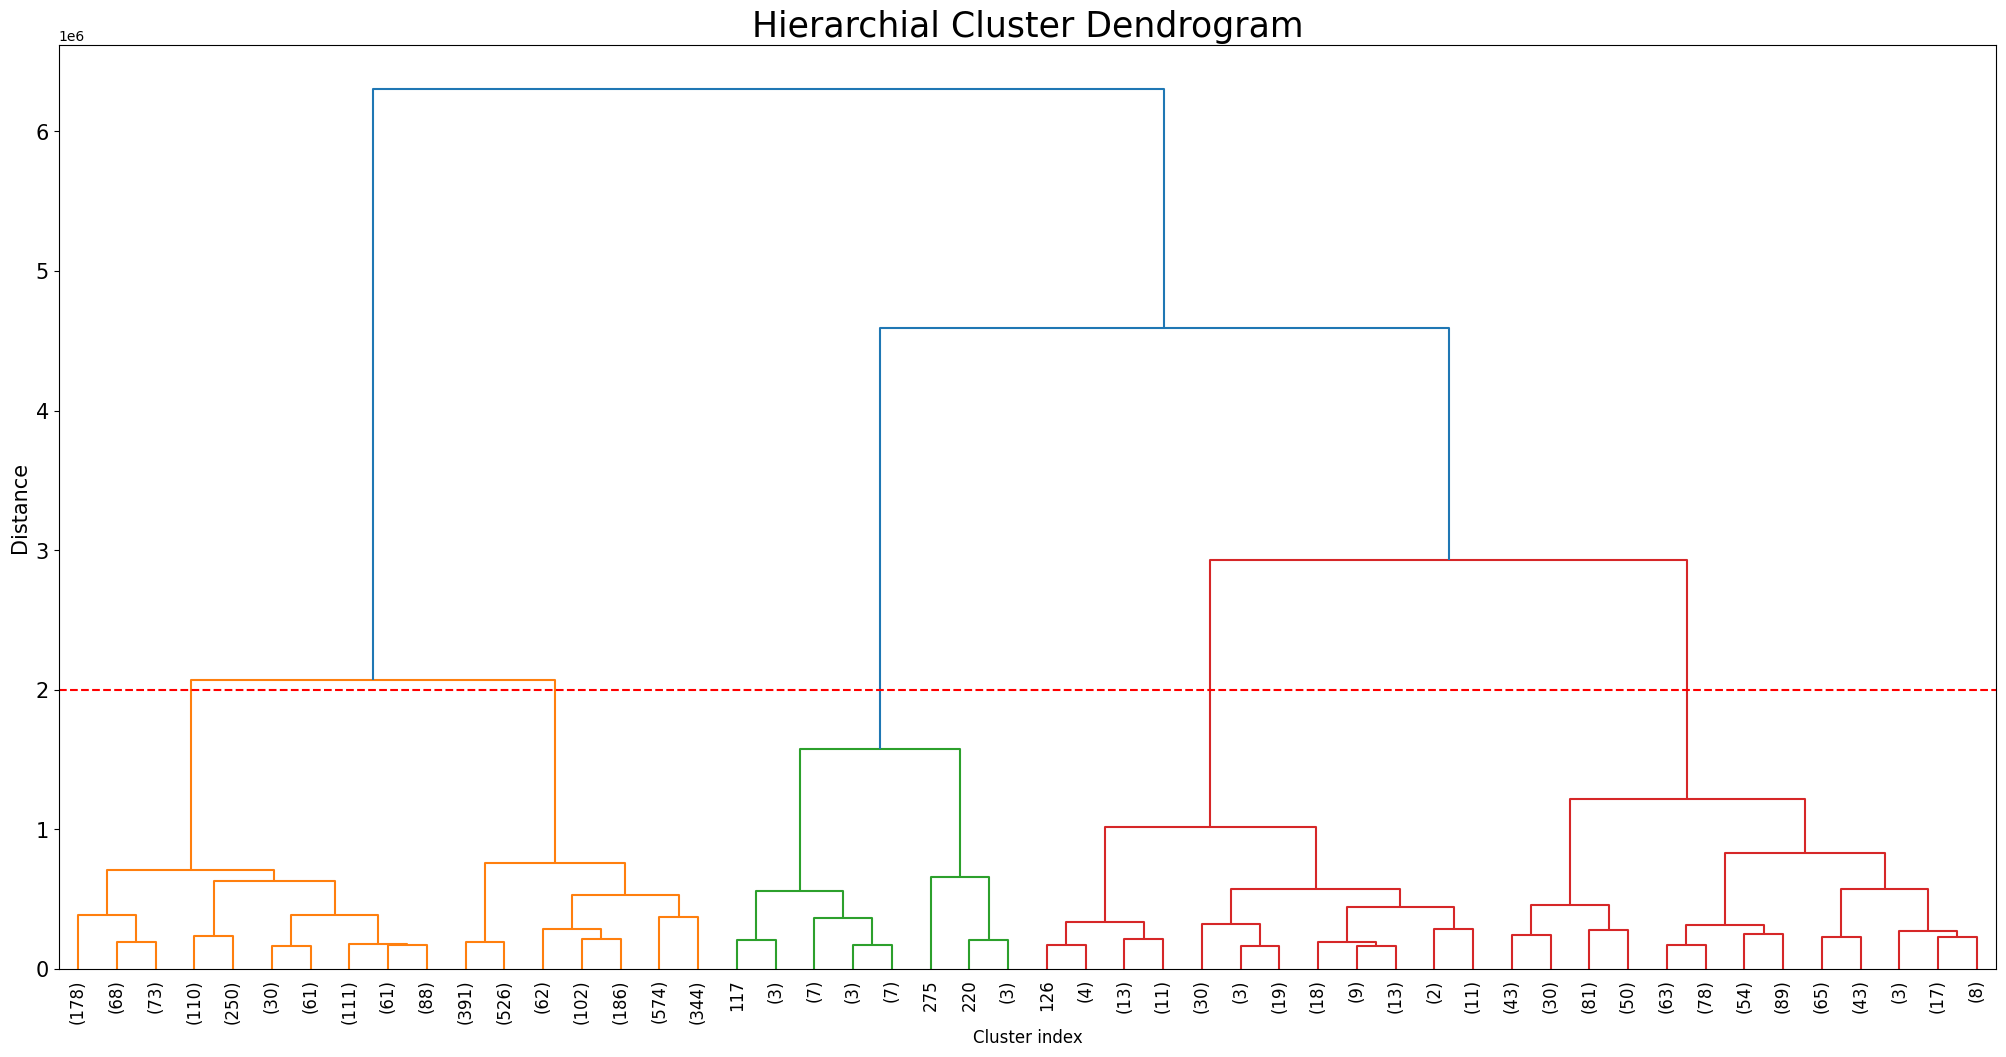

In [13]:
# Hierarchical Cluster

completeEuclidZ = linkage(newdf, method = "ward", metric = "euclidean")

fig = plt.figure(figsize=(25, 12))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(completeEuclidZ,
          truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
          p = 50, # Number of clusters
          leaf_rotation=90, # Rotates cluster numbers on x-axis
          leaf_font_size=12,
          show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.axhline(y=2000000, color='r', linestyle='--')
plt.show()

=> There are 5 clusters which are diverse.

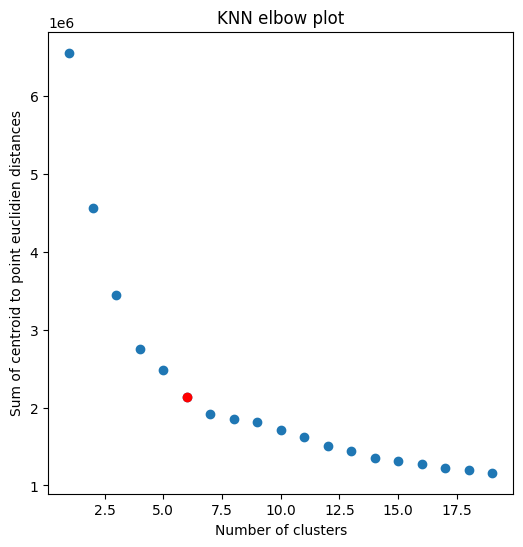

In [14]:
# k-means clustering

clusterSizes = list(range(1,20))
avgDistances = []

for k in clusterSizes:
    kmeans = KMeans(n_init= 1,n_clusters = k, random_state= 5)
    kmeans.fit(newdf)

    distForK = kmeans.transform(newdf)
    point2ClusterDistance = np.min(distForK,axis = 1)
    avgDistances.extend([np.sqrt((point2ClusterDistance**2).sum())])

plt.figure(figsize=(6,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of centroid to point euclidien distances')
plt.xlabel('Number of clusters')
plt.title('KNN elbow plot')
#You can modify the code below according to elbow plot
plt.scatter(clusterSizes[5] , avgDistances[5], color = 'red')
plt.show()


Elbow at 5

In [15]:
# Define and fit the model, which is similar format to previous regression models
KMeans = KMeans(n_init = 1, n_clusters=5, random_state = 5)
KMeans.fit(newdf)

# Get cluster assignments for each datapoint
clK = KMeans.labels_

In [17]:
clK_df = pd.DataFrame(clK, columns=['cluster'])
result = pd.concat([newdf, clK_df], axis = 1)

In [20]:
numerical_col = [col for col in result.columns if col not in ['cluster']]
result_summary = result.groupby('cluster').agg({**{'cluster': 'count'}, **{col: 'mean' for col in numerical_col}}) \
    .rename(columns={'cluster': 'num_customers', **{col: f'{col}_mean' for col in numerical_col}}).T

# Apply the background gradient and format the precision
result_summary.style.background_gradient(axis=1, cmap='Blues').format(precision=2)

cluster,0,1,2,3,4
num_customers,999.00,2765.00,200.00,30.00,5.00
balance_mean,123876.83,30257.41,301399.16,673086.50,1288915.80
qual_miles_mean,209.36,102.24,309.91,495.07,1528.00
cc1_miles_mean,2.95,1.65,3.10,3.43,3.00
cc2_miles_mean,1.01,1.02,1.01,1.00,1.00
cc3_miles_mean,1.03,1.01,1.00,1.10,1.00
bonus_miles_mean,30978.75,9825.84,42247.27,60036.07,39098.00
bonus_trans_mean,16.47,9.23,18.30,21.67,24.60
flight_miles_12mo_mean,736.11,288.28,1212.82,1698.13,2754.60
flight_trans_12_mean,2.12,0.88,3.67,5.47,11.40
